# 💻 Intersect

På samme måte som de romlige forholdene `within` og `contains` som ble dekket i [forrige seksjon](punkt_i_polygon), er et annet vanlig spørsmål om to geometrier krysser eller berører hverandre.

Begge spørringene er implementert i `shapely`:
- [`intersects()`](https://shapely.readthedocs.io/en/stable/manual.html#object.intersects): to objekter krysser hverandre hvis grensen eller innsiden av et objekt krysser på noen måte med grensen eller innsiden av det andre objektet.
- [`touches()`](https://shapely.readthedocs.io/en/stable/manual.html#object.touches): to objekter berører hverandre hvis objektene har minst ett punkt felles, men innsidene deres ikke krysser noen del av det andre objektet.

La oss teste disse funksjonene, for eksempel ved å bruke to linjer:

In [1]:
import shapely.geometry

linje1 = shapely.geometry.LineString([(0, 0), (1, 1)])
linje2 = shapely.geometry.LineString([(1, 1), (0, 2)])

In [2]:
linje1.intersects(linje2)

True

Linjene krysser. Berører de også?

In [3]:
linje1.touches(linje2)

True

`linje1` berører `linje2`. Å gjøre de om til en multi-linje er en rask måte å
tegne dem inne i en Jupyter-notebook:

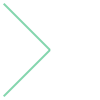

In [4]:
shapely.geometry.MultiLineString([linje1, linje2])

Vi kan se her, at de deler punktet `(1, 1)`, der `linje1` slutter, og
`linje2` begynner. De to linjene krysser ikke ellers (‘i deres indre’),
så spådommen ’`touch()`’ - som definert ovenfor - er sann.

Hvis linjene skulle dele noe av innsidene deres, ville det ikke bli regnet som
berøring. For eksempel, `linje1` berører ikke `linje1` (seg selv), men oppfyller
alle krav for å bli regnet som `intersect()`ing med seg selv:

In [5]:
linje1.touches(linje1)

False

In [6]:
linje1.intersects(linje1)

True